In [1]:
import pandas as pd
import numpy as np

from pandas.api.types import CategoricalDtype

from collections import defaultdict, Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import matplotlib.dates as mdates

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import datastats.singlevar as dssv
import datastats.multivar as dsmv
import datastats.hypotest as dsht
import datastats.plotting as dsplt

In [2]:
dsplt.SetParams()

### Prediciting possum head length with linear regression

In [3]:
possum_df = pd.read_csv('datasets/possum.csv')
possum_df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


Scatterplot

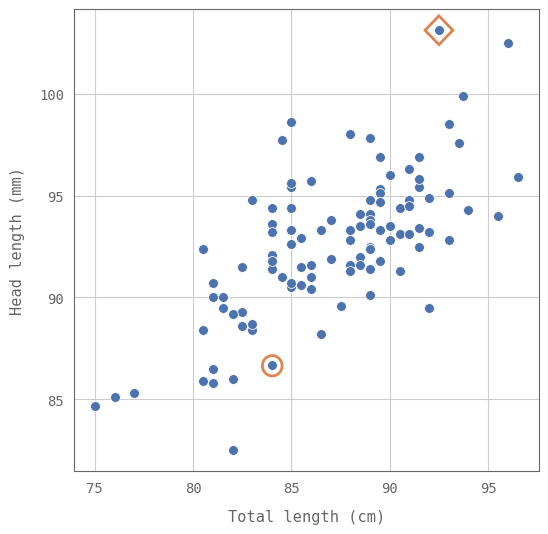

In [4]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)

sns.scatterplot(data=possum_df, x='total_l', y='head_l', ax=ax, s=50)

ax.set_ylabel('Head length (mm)')
ax.set_xlabel('Total length (cm)')

# Mark some points using shapes
circle = plt.Circle(xy=(84.02,86.65), radius=0.5, fill=False, color='C1', lw=2)
ax.add_artist(circle)

rect = plt.Rectangle(xy=(92.5,102.4), width=1, height=1, fill=False, angle=45, color='C1', lw=2)
ax.add_artist(rect)

Facet by sex

Text(0.5, 0, 'Total length (cm)')

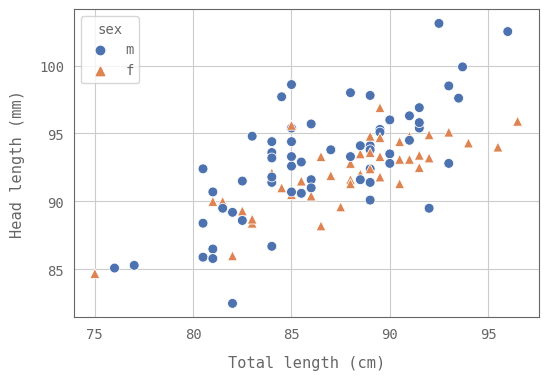

In [5]:
fig,ax = plt.subplots()
fig.set_size_inches(6,4)

sns.scatterplot(data=possum_df, x='total_l', y='head_l', ax=ax, hue='sex', style='sex', markers=['o','^'], s=50)

ax.set_ylabel('Head length (mm)')
ax.set_xlabel('Total length (cm)')

Take age into consideration

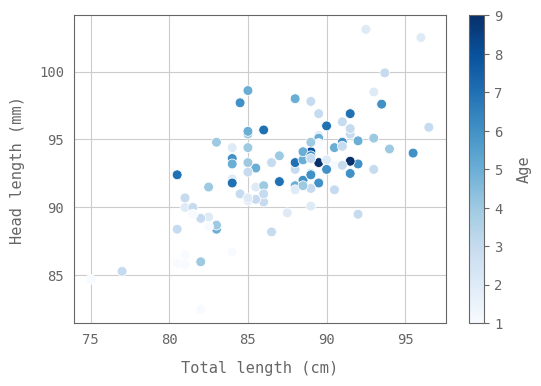

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(6,4)

palette = sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data=possum_df, x='total_l', y='head_l', ax=ax, hue='age', palette=palette, s=50)

ax.set_ylabel('Head length (mm)')
ax.set_xlabel('Total length (cm)')

# Add a colorbar and remove the numeric legend
norm = plt.Normalize(possum_df.age.min(), possum_df.age.max())
cmsm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
cmsm.set_array([])
fig.colorbar(cmsm, ax=ax, label='Age')
ax.get_legend().remove()

Recreate the possum data residuals plot

<AxesSubplot: xlabel='total_l', ylabel='head_l'>

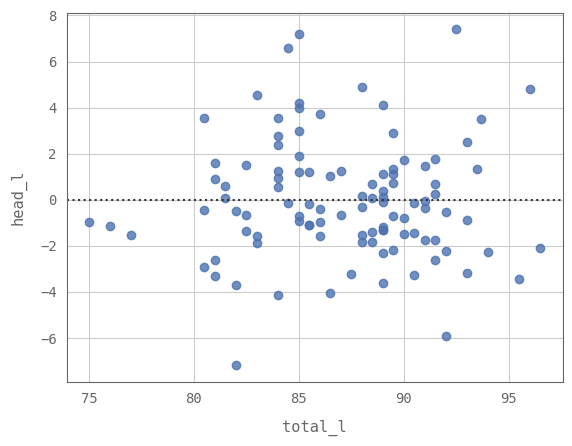

In [7]:
sns.residplot(data=possum_df, x='total_l', y='head_l')

### College gift aid prediction

In [8]:
aid_df = pd.read_csv('datasets/elmhurst.csv')
aid_df.head()

,family_income,gift_aid,price_paid
0,92.922,21.72,14.28
1,0.250,27.47,8.53
2,53.092,27.75,14.25
3,50.200,27.22,8.78
4,137.613,18.00,24.00


In [9]:
aid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   family_income  50 non-null     float64
 1   gift_aid       50 non-null     float64
 2   price_paid     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


Scatterplot with least squares line of best fit added

<AxesSubplot: xlabel='family_income', ylabel='gift_aid'>

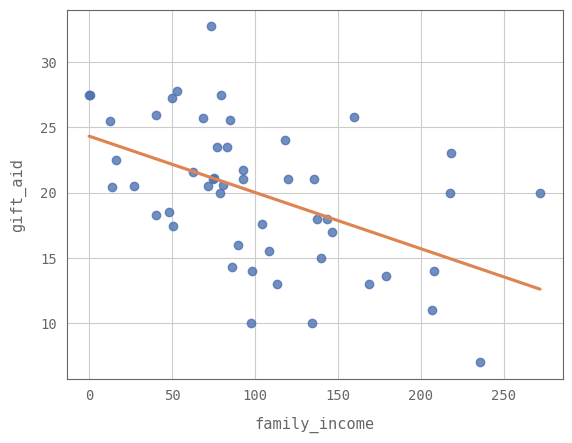

In [10]:
sns.regplot(data=aid_df, x='family_income', y='gift_aid', ci=False, line_kws={'color':'C1'})

Perform the least squares regression analysis using both the scipy and statsmodels methods

In [11]:
aid_regress_result = stats.linregress(x=aid_df.family_income, y=aid_df.gift_aid)
aid_regress_result

LinregressResult(slope=-0.04307165212532397, intercept=24.319329007270326, rvalue=-0.49855613703087254, pvalue=0.00022887344542874333, stderr=0.010809472818746545, intercept_stderr=1.2914502683417046)

In [12]:
x = aid_df.family_income
y = aid_df.gift_aid

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               gift_aid   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.88
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           0.000229
Time:                        08:05:11   Log-Likelihood:                -148.18
No. Observations:                  50   AIC:                             300.4
Df Residuals:                      48   BIC:                             304.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.3193      1.291     18.831

In [13]:
results.rsquared

0.2485582217711465

### Categorical predictors with two levels

In [14]:
mariokart_df = pd.read_csv('datasets/mariokart.csv')
mariokart_df.head()

,id,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels,title
0,150377422259,3,20,new,0.99,4.00,51.55,standard,1580,yes,1,~~ Wii MARIO KART &amp; WHEEL ~ NINTENDO Wii ~...
1,260483376854,7,13,used,0.99,3.99,37.04,firstClass,365,yes,1,Mariokart Wii Nintendo with wheel - Mario Kart...
2,320432342985,3,16,new,0.99,3.50,45.50,firstClass,998,no,1,Mario Kart Wii (Wii)
3,280405224677,3,18,new,0.99,0.00,44.00,standard,7,yes,1,Brand New Mario Kart Wii Comes with Wheel. Fre...
4,170392227765,1,20,new,0.01,0.00,71.00,media,820,yes,2,BRAND NEW NINTENDO 1 WII MARIO KART WITH 2 WHE...


In [15]:
mariokart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           143 non-null    int64  
 1   duration     143 non-null    int64  
 2   n_bids       143 non-null    int64  
 3   cond         143 non-null    object 
 4   start_pr     143 non-null    float64
 5   ship_pr      143 non-null    float64
 6   total_pr     143 non-null    float64
 7   ship_sp      143 non-null    object 
 8   seller_rate  143 non-null    int64  
 9   stock_photo  143 non-null    object 
 10  wheels       143 non-null    int64  
 11  title        142 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 13.5+ KB


Remove the records in which the price is above 100 dollars

In [16]:
mariokart_below100_df = mariokart_df[mariokart_df.total_pr < 100].copy()

In [17]:
mariokart_below100_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 142
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           141 non-null    int64  
 1   duration     141 non-null    int64  
 2   n_bids       141 non-null    int64  
 3   cond         141 non-null    object 
 4   start_pr     141 non-null    float64
 5   ship_pr      141 non-null    float64
 6   total_pr     141 non-null    float64
 7   ship_sp      141 non-null    object 
 8   seller_rate  141 non-null    int64  
 9   stock_photo  141 non-null    object 
 10  wheels       141 non-null    int64  
 11  title        140 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 14.3+ KB


Create a new field called `condnew` that will take on the value 1 if `cond` is new and 0 if `cond` is used

In [18]:
mariokart_below100_df['condnew'] = np.nan

mariokart_below100_df.loc[mariokart_below100_df.cond == 'new', 'condnew'] = 1
mariokart_below100_df.loc[mariokart_below100_df.cond == 'used', 'condnew'] = 0

mariokart_below100_df.condnew.value_counts()

0.0    82
1.0    59
Name: condnew, dtype: int64

Text(0, 0.5, 'Total Price')

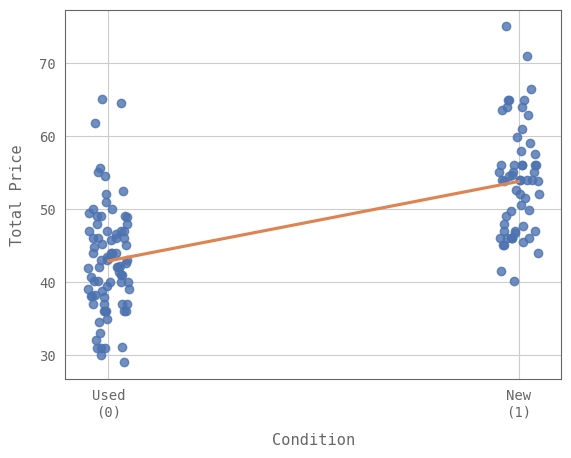

In [19]:
ax = sns.regplot(data=mariokart_below100_df, x='condnew', y= 'total_pr', 
                 x_jitter=0.05, ci=False, line_kws={'color':'C1'})

ax.set_xticks([0,1], ['Used\n(0)','New\n(1)'])
ax.set_xlabel('Condition')
ax.set_ylabel('Total Price')

Perform the linear regression analysis

In [20]:
x = mariokart_below100_df.condnew
y = mariokart_below100_df.total_pr

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               total_pr   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     75.03
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.06e-14
Time:                        08:05:11   Log-Likelihood:                -480.72
No. Observations:                 141   AIC:                             965.4
Df Residuals:                     139   BIC:                             971.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8711      0.814     52.668      0.0

In [21]:
results.params

const      42.871098
condnew    10.899580
dtype: float64

### Exercises

1.
Visualize the residuals. The scatterplots shown below each have a superimposed regression line. If we were to construct a residual plot (residuals versus x) for each, describe in words what those plots would look like.  
Plot a would have residuals uniformly spread but quite to the best fit line, whereas plot b would have points spread far from the line at lower values of x and closer to the line at higher values  
*I should use the term variability to more accurately describe how points are spread out from the best fit line*

2.
Trends in the residuals. Shown below are two plots of residuals remaining after fitting a linear model to two different sets of data. For each plot, describe important features and determine if a linear model would be appropriate for these data. Explain your reasoning.  
Plot a shows uniform distribution around the best fit line with values being closer to the line at lower values of x and further away at higher values. A linear model appears to be appropriate for this data. Plot b clearly seems to follow an non-linear pattern so a linear model would not be appropriate for this data.

3.
Identify relationships, I. For each of the six plots, identify the strength of the relationship (e.g., weak, moderate, or strong) in the data and whether fitting a linear model would be reasonable.  
a) strong, non-linear  
b) strong, linear  
c) weak, linear  
d) weak, non-linear  
e) strong, linear  
f) weak, no apparent relationship  
*In the answers d is stated to be moderate which makes sense because it does look moderate for a non-linear case. And for f it says that trying a linear fit would be reasonable, which I suppose means that even though the relationship is clearly very weak, or even pretty much non-existent, we can still try to fit a line to it*

4.
Identify relationships, II. For each of the six plots, identify the strength of the relationship (e.g., weak, moderate, or strong) in the data and whether fitting a linear model would be reasonable.  
a) strong, non-linear  
b) strong, non-linear  
c) strong, linear  
d) weak, no apparent relationship  
e) weak, linear  
f) moderate, linear  

5.
a.Based on these graphs, which of the two exams has the strongest correlation with the course grade? Explain.  
Graph b because the points are much more closely clustered and show a clear relationship  
b.Can you think of a reason why the correlation between the exam you chose in part (a) and the course grade is higher?  
Perhaps the questions on exam 2 were more closely related to the material studied in the course

6.
a.Describe the relationship between partners’ ages.  
There is a strong linear relationship  
b.Describe the relationship between partners’ heights.  
There appears to be a weak linear relationship here. Interestingly, people who are taller seem to show more of a tendency to have a partner who is also taller.  
c.Which plot shows a stronger correlation? Explain your reasoning.  
The partner age graph  
d.Data on heights were originally collected in centimeters, and then converted to inches. Does this conversion affect the correlation between partners’ heights?  
No

7.
Match the correlation, I. Match each correlation to the corresponding scatterplot.  
a is 4, b is 3, c is 1, d is 2

8.
Match the correlation, II. Match each correlation to the corresponding scatterplot.  
a is 2, b is 4, c is 3, d is 1

9.
Body measurements, correlation. Researchers studying anthropometry collected body and skeletal diameter measurements, as well as age, weight, height and sex for 507 physically active individuals. The scatterplot below shows the relationship between height and shoulder girth (circumference of shoulders measured over deltoid muscles), both measured in centimeters.  
a.Describe the relationship between shoulder girth and height.  
positive, moderate, linear  
b.How would the relationship change if shoulder girth was measured in inches while the units of height remained in centimeters?  
It would not change

10.
Compare correlations. Eduardo and Rosie are both collecting data on number of rainy days in a year and the total rainfall for the year. Eduardo records rainfall in inches and Rosie in centimeters. How will their correlation coefficients compare?  
The units they use will not affect the correlation

11.
The Coast Starlight, correlation. The Coast Starlight Amtrak train runs from Seattle to Los Angeles. The scatterplot below displays the distance between each stop (in miles) and the amount of time it takes to travel from one stop to another (in minutes).  
a.Describe the relationship between distance and travel time.  
There appears to be a weak positive linear relationship  
*Should have noted the clustering at the bottom left*  
b.How would the relationship change if travel time was instead measured in hours, and distance was instead measured in kilometers?  
The relationship would not change  
c.Correlation between travel time (in miles) and distance (in minutes) is r 0.636. What is the correlation between travel time (in kilometers) and distance (in hours)?  
The same

12.
Crawling babies, correlation. A study conducted at the University of Denver investigated whether babies take longer to learn to crawl in cold months, when they are often bundled in clothes that restrict their movement, than in warmer months. Infants born during the study year were split into twelve groups, one for each birth month. We consider the average crawling age of babies in each group against the average temperature when the babies are six months old (that’s when babies often begin trying to crawl). Temperature is measured in degrees Fahrenheit (F) and age is measured in weeks.
a.Describe the relationship between temperature and crawling age.  
There appears to be a weak negative linear relationship  
b.How would the relationship change if temperature was measured in degrees Celsius (C) and age was measured in months?  
It would not change
c.The correlation between temperature in F and age in weeks was r 0.70. If we converted the temperature to C and age to months, what would the correlation be?  
the same

13.
Partners’ ages. What would be the correlation between the ages of partners if people always dated others who are  
a.3 years younger than themselves?  
strong positive  
b.2 years older than themselves?  
strong positive  
c. half as old as themselves?  
strong positive  
*Actually the correlations will be exactly 1 for all three cases*

14.
Graduate degrees and salaries. What would be the correlation between the annual salaries of people with and without a graduate degree at a company if for a certain type of position someone with a graduate degree always made  
a.$5,000 more than those without a graduate degree?  
strong positive  
b.25\% more than those without a graduate degree?  
strong positive  
c.15\% less than those without a graduate degree?  
strong negative

15.
Units of regression. Consider a regression predicting the number of calories (cal) from width (cm) for a sample of square shaped chocolate brownies. What are the units of the correlation coefficient, the intercept, and the slope?  
correlation has no units, intercept will be in cal, slope is cal/cm

16.
Which is higher? Determine if (I) or (II) is higher or if they are equal: “For a regression line, the uncertainty associated with the slope estimate, b1, is higher when (I) there is a lot of scatter around the regression line or (II) there is very little scatter around the regression line.” Explain your reasoning.  
I because greater scatter around the regression line indicates a weaker relationship between the variables which means greater uncertainty.

17.
Over-under, I. Suppose we fit a regression line to predict the shelf life of an apple based on its weight. For a particular apple, we predict the shelf life to be 4.6 days. The apple’s residual is -0.6 days. Did we over or under estimate the shelf-life of the apple? Explain your reasoning.  
over-estimate becuase the estimate is higher than the actual value

18.
Over-under, II. Suppose we fit a regression line to predict the number of incidents of skin cancer per 1,000 people from the number of sunny days in a year. For a particular year, we predict the incidence of skin cancer to be 1.5 per 1,000 people, and the residual for this year is 0.5. Did we over or under estimate the incidence of skin cancer? Explain your reasoning.  
under-estimate because the actual value is higher than that predicted by our model

19.
Starbucks, calories, and protein. The scatterplot below shows the relationship between the number of calories and amount of protein (in grams) Starbucks food menu items contain. Since Starbucks only lists the number of calories on the display items, we might be interested in predicting the amount of protein a menu item has based on its calorie content.  
a.Describe the relationship between number of calories and amount of protein (in grams) that Starbucks food menu items contain.  
weak positive linear  
*The answer says moderate instead of weak, which I suppose makes sense because it has both strong and weak components*  
b.In this scenario, what are the predictor and outcome variables?  
predictor is calories and outcome is protien  
c.Why might we want to fit a regression line to these data?  
To visualize the trend and be able to predict new values  
d. What does the residuals vs. predicted plot tell us about the variability in our prediction errors based on this model for items with lower vs. higher predicted protein?  
at lower values there doesn't appear to be a relationship, but at higher values there is a weak positive linear relationship  
*I didn't answer this question correctly. It asked about variability and I talked about the relationship. I also mischaracterized the lower value part of the graph as having no relationship. I should have said that the variability is higher at higher values and lower at lower values of protein.*

20.
Starbucks, calories, and carbs. The scatterplot below shows the relationship between the number of calories and amount of carbohydrates (in grams) Starbucks food menu items contain. Since Starbucks only lists the number of calories on the display items, we might be interested in predicting the amount of carbs a menu item has based on its calorie content.  
a.Describe the relationship between number of calories and amount of carbohydrates (in grams) that Starbucks food menu items contain.  
moderate positive linear relationship  
b.In this scenario, what are the predictor and outcome variables?  
predictor is calories and carbs is outcome  
c.Why might we want to fit a regression line to these data?  
To visualize the trend and be able to predict new values  
d.What does the residuals vs. predicted plot tell us about the variability in our prediction errors based on this model for items with lower vs. higher predicted carbs?  
at lower values there could be a relationship but the best fit line is being pulled somewhat up from where it should be for these values, at higher values there is a more uniform spread above and below the line but it appears to be a somewhat weaker relationship at these values

21.
The Coast Starlight, regression. The Coast Starlight Amtrak train runs from Seattle to Los Angeles. The scatterplot below displays the distance between each stop (in miles) and the amount of time it takes to travel from one stop to another (in minutes). The mean travel time from one stop to the next on the Coast Starlight is 129 mins, with a standard deviation of 113 minutes. The mean distance traveled from one stop to the next is 108 miles with a standard deviation of 99 miles. The correlation between travel time and distance is 0.636.  
a.Write the equation of the regression line for predicting travel time.  
using the equations provided in section 7.2.3 we get a b1 value of 0.73 and a b0 value of 50.6  
y = 0.73x + 50.6  
b.Interpret the slope and the intercept in this context.  
The slope means that for every additional mile traveled the time increases by 0.73 minutes. The intercept, where the distance traveled is zero, should of course be zero, however there must be other factors affecting the outcome other than just the distance.  
c.Calculate R2 of the regression line for predicting travel time from distance traveled for the Coast Starlight, and interpret R2 in the context of the application.  
0.40, which means that the predictor variable accounts for about a 40\% reduction in variance  
d.The distance between Santa Barbara and Los Angeles is 103 miles. Use the model to estimate the time it takes for the Starlight to travel between these two cities.  
125.8 minutes  
e.It actually takes the Coast Starlight about 168 mins to travel from Santa Barbara to Los Angeles. Calculate the residual and explain the meaning of this residual value.  
The residual is 42.2. This means that we under-estimated the actual travel time using our model  
f.Suppose Amtrak is considering adding a stop to the Coast Starlight 500 miles away from Los Angeles. Would it be appropriate to use this linear model to predict the travel time from Los Angeles to this point?  
This point is outside the range of our original model so it would not be appropriate to apply it in this instance

22.
Body measurements, regression. Researchers studying anthropometry collected body and skeletal diameter measurements, as well as age, weight, height and sex for 507 physically active individuals. The scatterplot below shows the relationship between height and shoulder girth (circumference of shoulders measured over deltoid muscles), both measured in centimeters. The mean shoulder girth is 107.20 cm with a standard deviation of 10.37 cm. The mean height is 171.14 cm with a standard deviation of 9.41 cm. The correlation between height and shoulder girth is 0.67.  
a.Write the equation of the regression line for predicting height.
b1=0.61, b0=105.74, y=0.61x + 105.74  
b.Interpret the slope and the intercept in this context.  
The slope means that for every cm of shoulder girth increase the height increases by 0.61cm and the intercept doesn't really hae a true meaning because you cannot have zero shoulder girth  
c.Calculate R2 of the regression line for predicting height from shoulder girth, and interpret it in the context of the application.  
0.44, which means the model explains 44\% of the original variance  
d.A randomly selected student from your class has a shoulder girth of 100 cm. Predict the height of this student using the model.  
166.7
e.The student from part (d) is 160 cm tall. Calculate the residual, and explain what this residual means.  
The residual is 6.7 which means our model under estimated the actual value  
f.A one year old has a shoulder girth of 56 cm. Would it be appropriate to use this linear model to predict the height of this child?  
No this value is far below the range of our data so it would not be appropriate

23.
Poverty and unemployment. The following scatterplot shows the relationship between percent of population below the poverty level (poverty) from unemployment rate among those ages 20-64 (unemployment_rate) in counties in the US, as provided by data from the 2019 American Community Survey. The regression output for the model for predicting poverty from unemployment_rate is also provided.  
a.Write out the linear model.  
y = 2.05x + 4.60  
b.Interpret the intercept.  
The intercept is the predicted percent below the poverty level when unemployment rate is zero  
c.Interpret the slope.  
The slope tells us that for every 1\% increase in unemployment rate we get 2.05 percent increase in percent below the poverty level  
d.For this model R2 is 46\%. Interpret this value.  
This means that 46\% of the original variance is explained by the model  
e.Calculate the correlation coefficient.  
0.68

24.
Cats weights. The following regression output is for predicting the heart weight (Hwt, in g) of cats from their body weight (Bwt, in kg). The coefficients are estimated using a dataset of 144 domestic cats.  
a.Write out the linear model.  
y = 4.034x - 0.357  
b.Interpret the intercept.  
The intercept doesn't have any real practical meaning because we cannot have zero weight  
c.Interpret the slope.  
The slope means for every kg increase in heart weight the body weight increase by 4.034 kg  
d.The R2 of this model is 1\%. Interpret R2.  
The model only explains 1\% of the original variance  
e.Calculate the correlation coefficient.  
0.1

25.
Outliers, I. Identify the outliers in the scatterplots shown below, and determine what type of outliers they are. Explain your reasoning.
Plot 1 outlier is far away from the best fit line, and pulls it significantly, so it is an influential point  
*Also need to mention that it is high leverage because it is far from the center of the data*  
Plot 2 outlier is in line with the other data points so it does not significantly influence the best fit line  
*Need to note however that it is still high leverage though because it is far from the center of the data*  
Plot 3 outlier is far away from the best fit line, but does not pull it significantly, so it is not an influential point  
*This one is not high leverage because it is in the center of the data in the x-axis direction*  

26.
Outliers, II. Identify the outliers in the scatterplots shown below and determine what type of outliers they are. Explain your reasoning.  
Plot 1 outlier is horizontally far from the other points so it is an influential point, pulling the best fit line  
Plot 2 outlier is far horizontally from the other points but is somewhat in line with the others so it is an influential point that has a moderate effect on the best fit line.  
Plot 3 outlier is far from the others but not horizontally far so it does not have a significant effect on the best fit line and is not an influential point.

27.
Urban homeowners, outliers. The scatterplot below shows the percent of families who own their home vs. the percent of the population living in urban areas. There are 52 observations, each corresponding to a state in the US. Puerto Rico and District of Columbia are also included.  
a.Describe the relationship between the percent of families who own their home and the percent of the population living in urban areas.  
weak negative linear relationship  
*The answer describes this relationship as "moderate to strong and somewhat linear". I guess I called it weak because I was looking at it as a linear relationship, not somewhat linear. I suppose if you look at it as somewhat linear, then the relationship could be characterized as a bit stronger.*  
b.The outlier at the bottom right corner is District of Columbia, where 100\% of the population is considered urban. What type of an outlier is this observation?  
This would likely be a moderately influential point because it's somewhat horizontally far from the other points.  
*The horizontally far aspect actually makes it high leverage, not influential. It's influential because it affects the slope of the line.*  

28.
Crawling babies, outliers. A study conducted at the University of Denver investigated whether babies take longer to learn to crawl in cold months, when they are often bundled in clothes that restrict their movement, than in warmer months. The plot below shows the relationship between average crawling age of babies born in each month and the average temperature in the month when the babies are six months old. The plot reveals a potential outlying month when the average temperature is about 53F and average crawling age is about 28.5 weeks. Does this point have high leverage? Is it an influential point?  
This point is not horizontally far from the others so it is not high leverage, and it would also not likely be influential either.

29.
True / False. Determine if the following statements are true or false. If false, explain why.  
a.A correlation coefficient of -0.90 indicates a stronger linear relationship than a correlation of 0.5.  
True  
b.Correlation is a measure of the association between any two variables.  
True  
*This is False, because it the measure of association between any two "numerical" variables.*  

30.
Cherry trees. The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  
a.Describe the relationship between volume and height of these trees.  
moderate positive linear  
b.Describe the relationship between volume and diameter of these trees.  
strong positive linear  
c.Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.  
The diameter because the stronger relationship results in more accurate predictions

31.
Match the correlation, III. Match each correlation to the corresponding scatterplot.  
a is 1, b is 4, c is 2, d is 3

32.
Helmets and lunches. The scatterplot shows the relationship between socioeconomic status measured as the percentage of children in a neighborhood receiving reduced-fee lunches at school (lunch) and the percentage of bike riders in the neighborhood wearing helmets (helmet). The average percentage of children receiving reduced-fee lunches is 30.833\% with a standard deviation of 26.724\% and the average percentage of bike riders wearing helmets is 30.883\% with a standard deviation of 16.948\%.  
a.If the R2 for the least-squares regression line for these data is 72\%, what is the correlation between lunch and helmet?  
0.85  
b.Calculate the slope and intercept for the least-squares regression line for these data.  
b1 = 0.54, b0 = 14.183  
b.Interpret the intercept of the least-squares regression line in the context of the application.  
The intercept is what the percentage of bike riders wearing helmets would be when the percentage receiving free lunch was zero  
c.Interpret the slope of the least-squares regression line in the context of the application.  
The slope means the percentage of riders wearing helmets would increase 0.54\% for every percent of percent receiving free lunches  
d. What would the value of the residual be for a neighborhood where 40\% of the children receive reduced-fee lunches and 40\% of the bike riders wear helmets? Interpret the meaning of this residual in the context of the application.  
The predicted value is 35.78 so the residual is 4.22. This means that our model under-estimated the actual value by 4.22\%